# Multiple Linear Regression with R

This notebook is a brief tutorial on how to perform simple and multiple linear regression using the R programming language. The tutorial assumes prior knowledge of the theory of linear regression (estimation of coefficients; $p$-values etc.), but it assumes no prior knowledge of the R programming language beyond what can be learned from the page: ['A very brief introduction to programming'](R.1_very_brief_introduction_to_programming.ipynb). If you are unfamiliar with R please read the 'A very brief introduction to programming' page first.

The code cell below imports several *libraries* that will be used later in the tutorial. These are chunks of pre-written code that perform various useful functions. For instance the library `scatterplot3d`, as the name implies, let's us easily create 3D scatterplots:

In [1]:
# press Contrl + Enter simultaneously to run this cell, or any other cell in this notebook
# this cell imports the libraries needed for this page, these contain additional functions, which are not part of 
# the base R language
library("scatterplot3d") 
library(car)
library(MASS)

Loading required package: carData



Let's delve into importing the data we will use to perform linear regression...

## Reading and organizing your data

The data we will analyse in this notebook is from https://ratemyprofessors.com. It shows the average student ratings of profressors within a specific academic subject, in a variety of rating domains (`easiness`, `helpfulness` etc.).

The `read_csv()` function will load a csv file into the notebook. The code `df = ` stores the data in a variable called `df`, standing for *dataframe*. A dataframe is essentially a fancy spreadsheet:

In [2]:
# read in the data from a csv
df = read.csv('data/rate_my_course.csv')

# show the dataframe
df

discipline,no_of_professors,clarity,helpfulness,overall_quality,easiness
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
English,23343,3.756147,3.821866,3.791364,3.162754
Mathematics,22394,3.487379,3.641526,3.566867,3.063322
Biology,11774,3.608331,3.701530,3.657641,2.710459
Psychology,11179,3.909520,3.887536,3.900949,3.316210
History,11145,3.788818,3.753642,3.773746,3.053803
Chemistry,7346,3.387174,3.538980,3.465485,2.652054
Communications,6940,3.867349,3.878602,3.875019,3.379829
Business,6120,3.640327,3.680503,3.663332,3.172033
Political Science,5824,3.759018,3.748676,3.756197,3.057758


*Note*: to use `read_csv()` the way it is used above (e.g. by passing it the name of the file we want to read in) the csv file must be in the same folder as the notebook. You can use the function `getcwd()` to print out the current working directory to show the path of the folder you need to place the csv file in:

In [3]:
getwd()

[1] "C:/Users/peter/r_tutorials"

Once we have loaded in our dataframe, we can use the `summary()` function to easily get descriptive statistics for each variable in the dataset:

In [28]:
# show descriptive statistics for the whole dataframe
summary(df)

  discipline        no_of_professors     clarity       helpfulness   
 Length:75          Min.   :  102.0   Min.   :3.294   Min.   :3.418  
 Class :character   1st Qu.:  250.5   1st Qu.:3.611   1st Qu.:3.641  
 Mode  :character   Median :  913.0   Median :3.714   Median :3.748  
                    Mean   : 2451.9   Mean   :3.709   Mean   :3.758  
                    3rd Qu.: 2499.5   3rd Qu.:3.830   3rd Qu.:3.882  
                    Max.   :23343.0   Max.   :4.159   Max.   :4.189  
 overall_quality    easiness    
 Min.   :3.382   Min.   :2.652  
 1st Qu.:3.624   1st Qu.:3.028  
 Median :3.747   Median :3.194  
 Mean   :3.736   Mean   :3.186  
 3rd Qu.:3.849   3rd Qu.:3.347  
 Max.   :4.178   Max.   :3.883  

To get data out from a dataframe, in order to analyse it, we can use the following syntax (where `df` is whatever we have called the dataframe): `df[row, column]`.

So if we want the data from the first column, third row we would use:

In [4]:
# get the data from the 1st row, third column
df[1, 3]

[1] 3.756147

Missing out the second number says 'give me all the columns'. So if we wanted the first row, all columns, we would use:

In [5]:
# show the first row, all columns
df[1, ]

,discipline,no_of_professors,clarity,helpfulness,overall_quality,easiness
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,English,23343,3.756147,3.821866,3.791364,3.162754


We can use a colon `:` to ask R to retrieve rows between certain values. For instance, if we wanted the first 10 rows, all columns, we can use:

In [6]:
# show the first 10 rows, all columns
df[1:10, ]

,discipline,no_of_professors,clarity,helpfulness,overall_quality,easiness
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,English,23343,3.756147,3.821866,3.791364,3.162754
2,Mathematics,22394,3.487379,3.641526,3.566867,3.063322
3,Biology,11774,3.608331,3.701530,3.657641,2.710459
4,Psychology,11179,3.909520,3.887536,3.900949,3.316210
5,History,11145,3.788818,3.753642,3.773746,3.053803
6,Chemistry,7346,3.387174,3.538980,3.465485,2.652054
7,Communications,6940,3.867349,3.878602,3.875019,3.379829
8,Business,6120,3.640327,3.680503,3.663332,3.172033
9,Political Science,5824,3.759018,3.748676,3.756197,3.057758


This method of getting data out of a dataframe is called *integer indexing* as we use integer values to tell R which rows and columns we want. We can also use the names of columns to tell R which data we want, which we will turn to now.

## Selecting & plotting data
To fit a linear regression model, we will need to extract entire columns from the dataframe, some columns to use as predictors, others to use as the outcome variable. We use the symbol `$` to do this.

We place the `$` symbol after the name of the dataframe, followed by the name of the column. So, in the present contet, if we want the `easiness` column we would use `df$easiness`:

In [7]:
# get one column from the dataframe, in this case the `easiness` column
df$easiness

[1] 3.162754 3.063322 2.710459 3.316210 3.053803 2.652054 3.379829 3.172033
 [9] 3.057758 2.910078 3.115357 3.395819 3.132724 2.784706 3.277406 2.854413
[17] 2.785668 3.248045 3.430916 3.542273 3.138076 3.468012 3.344138 2.885714
[25] 3.469440 3.244433 3.194300 3.338846 3.144567 2.868762 3.106578 3.584508
[33] 3.242423 2.693512 3.086938 3.217886 3.832250 3.125378 3.202725 3.068775
[41] 2.676069 3.109659 3.349743 3.268293 3.387630 3.324156 3.276412 3.180846
[49] 3.423021 3.674701 3.314322 3.199716 2.978182 2.977254 3.471498 2.825019
[57] 3.178866 2.887940 3.323158 3.365544 2.830455 3.606082 3.002857 3.267099
[65] 3.882635 3.275238 3.402397 3.541439 3.468333 2.969417 2.863504 3.106727
[73] 3.309636 2.799135 3.109118

If we just type `df$` and press the tab key, with the mouse cursor placed immediately after the `$`, R will helpfully show us all the columns which are availbe to retrieve:

![](images/df_cols.png)

Using column names to retrieve data is called *label-based indexing*, in contrast to the integer based indexing we saw earlier.

Once we've got the data out of the dataframe, R makes it easy to produce really high quality plots.

For example, we can pass a column of the dataframe to the `hist()` function to get a histogram of the average `easiness` ratings:

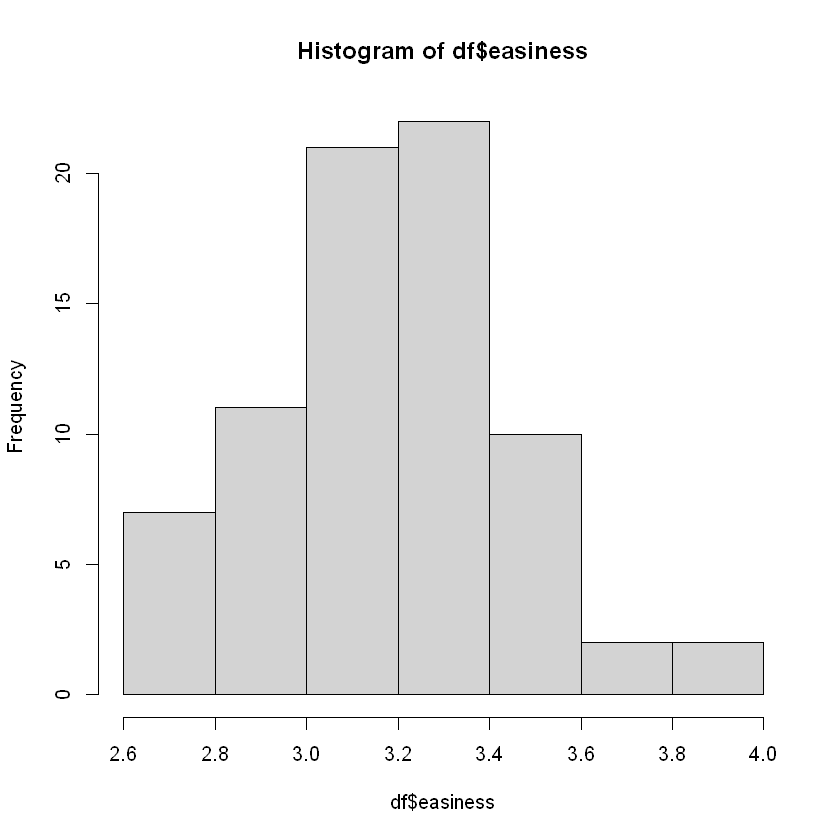

In [8]:
# plot a histograme of the `easiness` column
hist(df$easiness)

We can pass extra arguments to the `hist()` function, alongside the `df$easiness` column, in order to add nicer looking axis titles.

The `xlab =` argument sets the x axis label, and the `main =` argument sets the plot title:

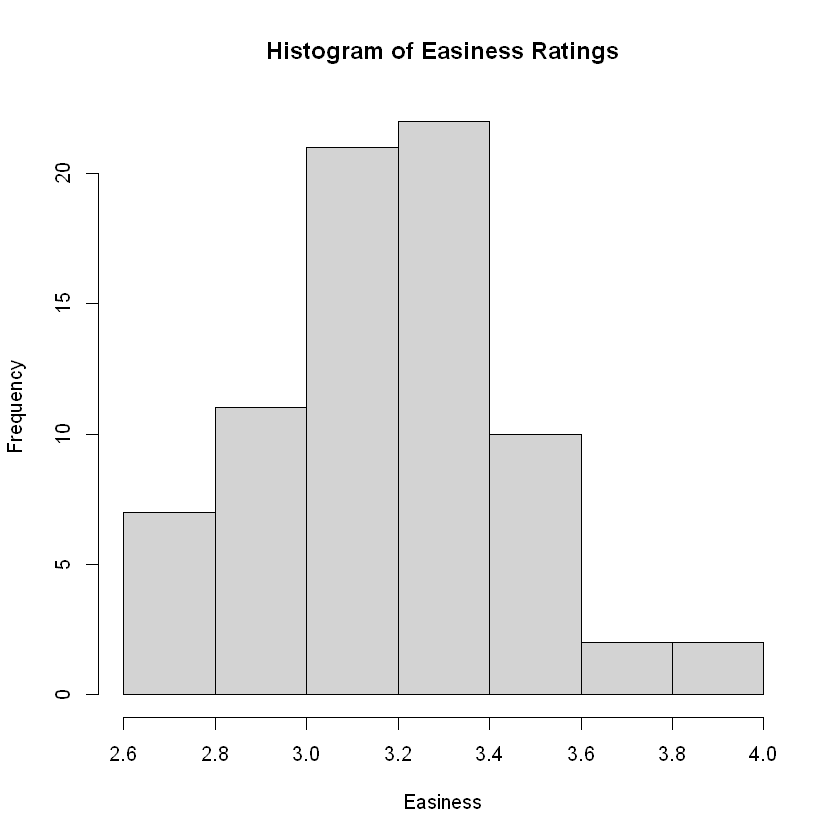

In [9]:
# plot a histograme of the `easiness` column, with better axis labels
hist(df$easiness, xlab = 'Easiness', main = 'Histogram of Easiness Ratings')

We can use the `plot()` function to create a scatterplot, to do this we pass the function two columns from the dataframe. The data from the first column will be plotted on the x axis, the data from the second column will be plotted on the y axis:

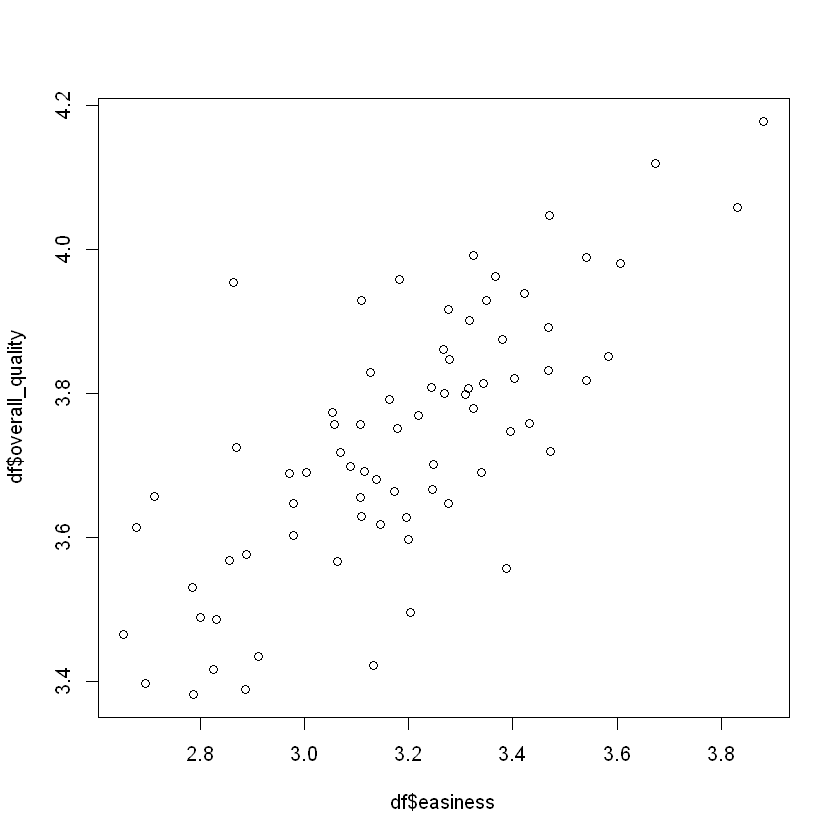

In [10]:
# create a scatterplot of `easiness` against `overall_quality`
plot(df$easiness, df$overall_quality)

We can use the `xlab = ` and `ylab = ` arguments to add nicer axis labels:

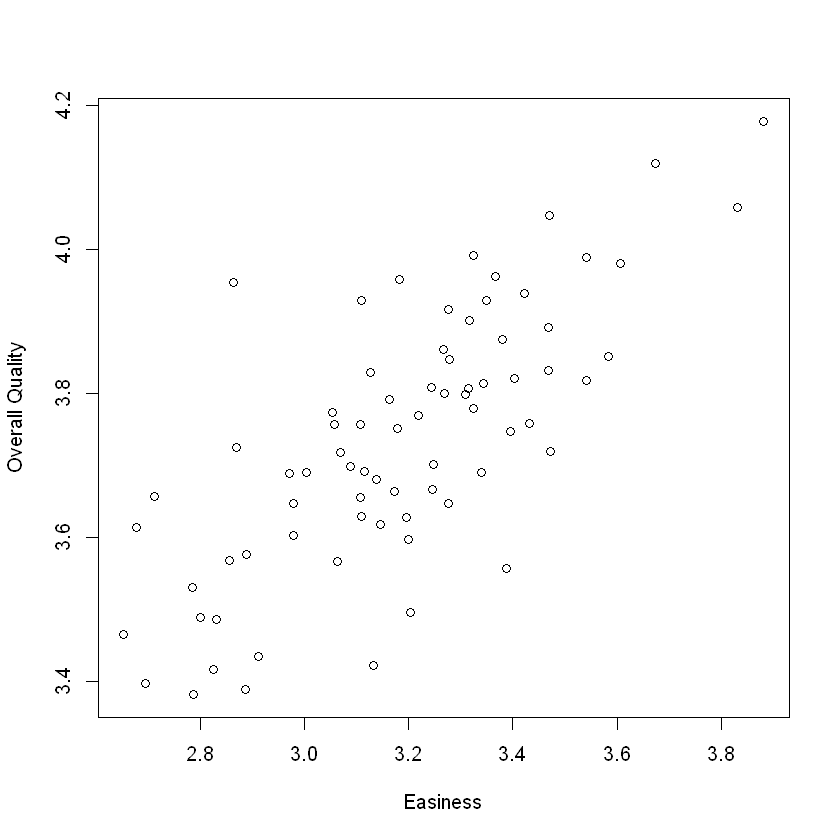

In [11]:
# create a scatterplot of `easiness` against `overall_quality`, with better labels
plot(df$easiness, df$overall_quality, xlab = 'Easiness', ylab = 'Overall Quality')

What about if we want only a subset of the columns in a dataframe, but would like to view them in their own dataframe, rather than as separate columns?

For instance, if we wanted to get the `easiness` ratings and the `overall_quality` ratings in a dataframe of their own? First, we'd need to use the `c()` function (`c` stand for 'combine'). 

We pass the names of the columns (each within quotation marks) to the `c()` function. We then use this as the column index, as in the cell below:

In [12]:
# get all the rows, from just the `easiness` and `overall_quality` columns
df[, c('easiness', 'overall_quality')]

easiness,overall_quality
<dbl>,<dbl>
3.162754,3.791364
3.063322,3.566867
2.710459,3.657641
3.316210,3.900949
3.053803,3.773746
2.652054,3.465485
3.379829,3.875019
3.172033,3.663332
3.057758,3.756197


We can use a colon in the same manner as before, to ask R things like 'give me only the first 10 rows':

In [13]:
# get the first ten rows, from just the `easiness` and `overall_quality` columns, from the `df` dataframe
df[1:10, c('easiness', 'overall_quality')]

,easiness,overall_quality
,<dbl>,<dbl>
1,3.162754,3.791364
2,3.063322,3.566867
3,2.710459,3.657641
4,3.316210,3.900949
5,3.053803,3.773746
6,2.652054,3.465485
7,3.379829,3.875019
8,3.172033,3.663332
9,3.057758,3.756197


### Conditional subsetting

Often, we might want to get data out of a dataframe according to some condition.

To do this we can use the `subset()` function. The first argument we give it should be the dataframe we want to get data from, in this case our dataframe is caled `df`.

Then, after a comma, we can give it a set of conditions. For instance, the statement in the cell below reads 'get me the subset of rows from the dataframe `df` where `easiness` is greater than 3.5 and `overall_quality` is greater than 4':

In [14]:
subset(df, easiness > 3.5 & overall_quality > 4)

,discipline,no_of_professors,clarity,helpfulness,overall_quality,easiness
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
37,Physical Education,991,4.078698,4.030797,4.057719,3.832250
50,Speech,351,4.133191,4.101197,4.119345,3.674701
65,Reading,148,4.159392,4.188919,4.177500,3.882635


## Simple linear regression

We have the tools we need to fit a simple linear regression model to the RateMyProfessors data.

Fitting models is easy with R. In fact, to fit a linear regression model to this data, all we need is the `lm()` function (`lm` standing for 'linear model').

If you are using an interactive version of this notebook, run the cell below to see the documentation for the `lm()` function (an image of the documentation is also shown below the cell, in case you are not using an interactive version of this notebook):

In [15]:
# run this cell to see the documentation for the `lm()` function
?lm

![](images/lm_documentation.png)

To fit the linear regression model, we need only one line of code.

First, we type the formula of the model in the form of:

`outcome ~ predictor` (where the `~` means 'is a function of, and `outcome` and `predictor` are the names of of the dataframe columns which we want in the model).

We then type a comma, and follow this with the argument `data = df` (where `df` is the name of our dataframe). So the code `lm(overall_quality ~ helpfulness, data = df)` reads: 'from the `df` dataframe, predict `overall_quality` from `helpfulness`, using a linear regression model':

*Note*: the `mod =` part of the code stores the fitted linear regression model as a variable called `mod`, so that we can pass it to other functions (e.g. plotting functions):

In [16]:
# fit the linear regression model, store the results of the model in a variable called `mod`
mod = lm(overall_quality ~ helpfulness, data = df)

# show the model results
mod


Call:
lm(formula = overall_quality ~ helpfulness, data = df)

Coefficients:
(Intercept)  helpfulness  
    -0.1834       1.0429  


We can get a better summary table, replete with $F$ statistics, $p$-values and $r^2$ statistics etc, buy passing the linear model variable to the `summary()` function:

In [17]:
summary(mod)


Call:
lm(formula = overall_quality ~ helpfulness, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.068065 -0.016090  0.001998  0.021534  0.065519 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.18336    0.07367  -2.489   0.0151 *  
helpfulness  1.04286    0.01958  53.254   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02876 on 73 degrees of freedom
Multiple R-squared:  0.9749,	Adjusted R-squared:  0.9746 
F-statistic:  2836 on 1 and 73 DF,  p-value: < 2.2e-16


## Multiple Linear Regression

Fitting a multiple regression model is a simple extension of the process we have just seen.

There is also a very crisp looking `scatterplot3D()` function for visualizing the relationship between multiple variables, which we can use for graphical inspection, prior to fitting a multi-predictor linear regression model. We simply tell the function which dataframe columns we want for the x, y and z axis:

*Note*: the `scatterplot3d()` function is not built in to R, it was imported using the `library()` function at the start of the notebook.

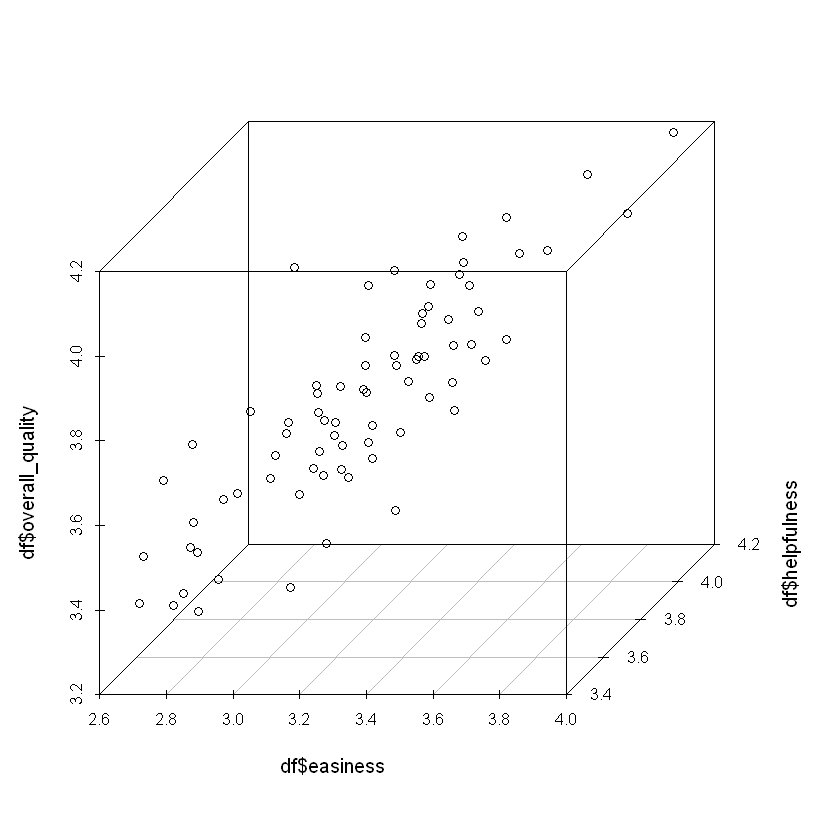

In [18]:
# create a 3D scatterplot 
scatterplot3d(x= df$easiness, z= df$overall_quality, y= df$helpfulness)

As before, its very easy to specify extra arguments to add nicer axis labels:

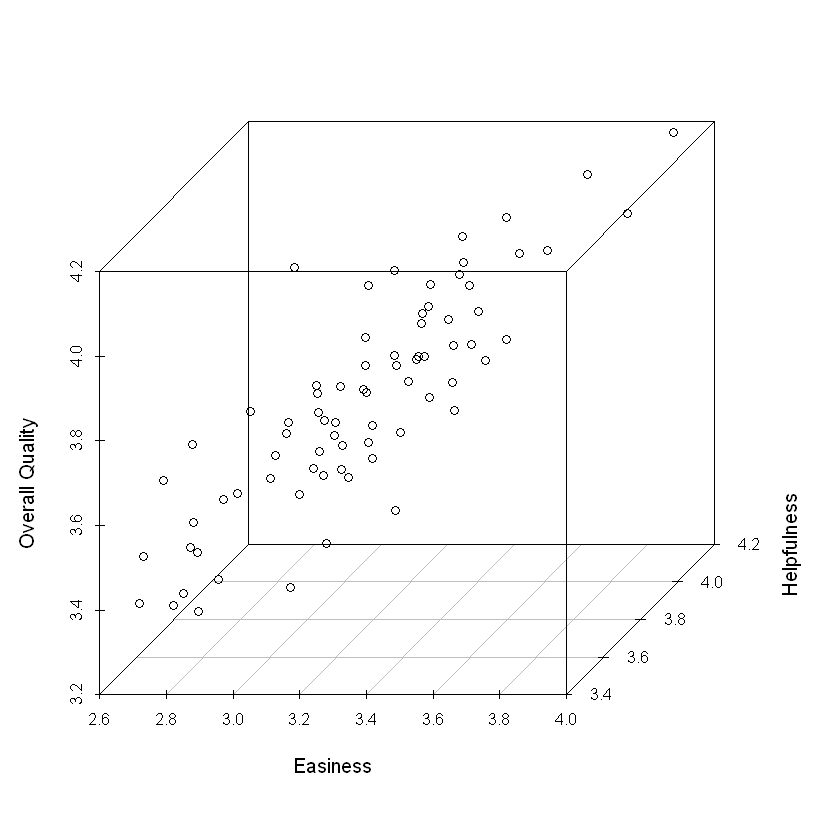

In [19]:
# create a 3D scatterplot
scatterplot3d(x= df$easiness, z= df$overall_quality, y= df$helpfulness, xlab = 'Easiness', ylab = 'Helpfulness',
             zlab = 'Overall Quality')

Now, we will fit the multiple regression model. We will predict `overall_quality` from `helpfulness` and `easiness`. To do this, we simply add the new predictor into the formula we used earlier.

So the code `lm(overall_quality ~  helpfulness + easiness, data = df )` reads "using data from the `df` dataframe, predict `overall_quality` as a function of `helpfulness` and `easiness`, using linear regression model". 

We will store this model as a variable called `mod_2`:

In [20]:
# fit the multiple linear regression model
mod_2 = lm(overall_quality ~  helpfulness + easiness, data = df )

# show the model
mod_2


Call:
lm(formula = overall_quality ~ helpfulness + easiness, data = df)

Coefficients:
(Intercept)  helpfulness     easiness  
    -0.1311       0.9842       0.0528  


Once again, its easy to get a more informative summary by passing our model variable to the `summary()` function:

In [21]:
# show a more detailed model summary
summary(mod_2)


Call:
lm(formula = overall_quality ~ helpfulness + easiness, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.061516 -0.018656  0.002578  0.018646  0.062033 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.13113    0.07179  -1.826   0.0719 .  
helpfulness  0.98421    0.02662  36.977   <2e-16 ***
easiness     0.05280    0.01719   3.071   0.0030 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02723 on 72 degrees of freedom
Multiple R-squared:  0.9778,	Adjusted R-squared:  0.9772 
F-statistic:  1587 on 2 and 72 DF,  p-value: < 2.2e-16


### Interaction terms

It's also very easy to add an interaction term to the model, we just add it to the formula, as we did with the extra predictor. In the present case, we can test for an interaction between `helpfulness` and `easiness` by adding the term `+ helpfulness : easiness` to the model formula:

In [22]:
# fit the multiple linear regression model, with an interaction term
mod_3 = lm(overall_quality ~  helpfulness + easiness + helpfulness : easiness, data = df )

# show the model summary
summary(mod_3)


Call:
lm(formula = overall_quality ~ helpfulness + easiness + helpfulness:easiness, 
    data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.062211 -0.017445  0.002775  0.017802  0.060833 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.56170    0.69811  -0.805    0.424    
helpfulness           1.09843    0.18612   5.902 1.12e-07 ***
easiness              0.18815    0.21895   0.859    0.393    
helpfulness:easiness -0.03581    0.05775  -0.620    0.537    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02735 on 71 degrees of freedom
Multiple R-squared:  0.9779,	Adjusted R-squared:  0.977 
F-statistic:  1049 on 3 and 71 DF,  p-value: < 2.2e-16


## Linear regression diagnostics

R is extremely streamlined for statistical analysis and contains a large number of functions for model diagnostics.

Some of the main assumptions of linear regression can be summarized with the acronym:

<b>L</b>inearity

<b>I</b>ndependence of Observations

<b>N</b>ormality of Residuals

<b>E</b>quality of Variance (of Residuals)

Here are some of the ways we can check these assumptions for our model, using very few lines of code (you can see that for many of them, we just pass the `mod` variable to some other function). I will not go into details about this code, but please read the comments, which explain what each line is doing.

#### Checking the Linearity assumption

The cell below generates a *Residuals vs Fitted* plot, which helps us graphically check the Linearity assumption:

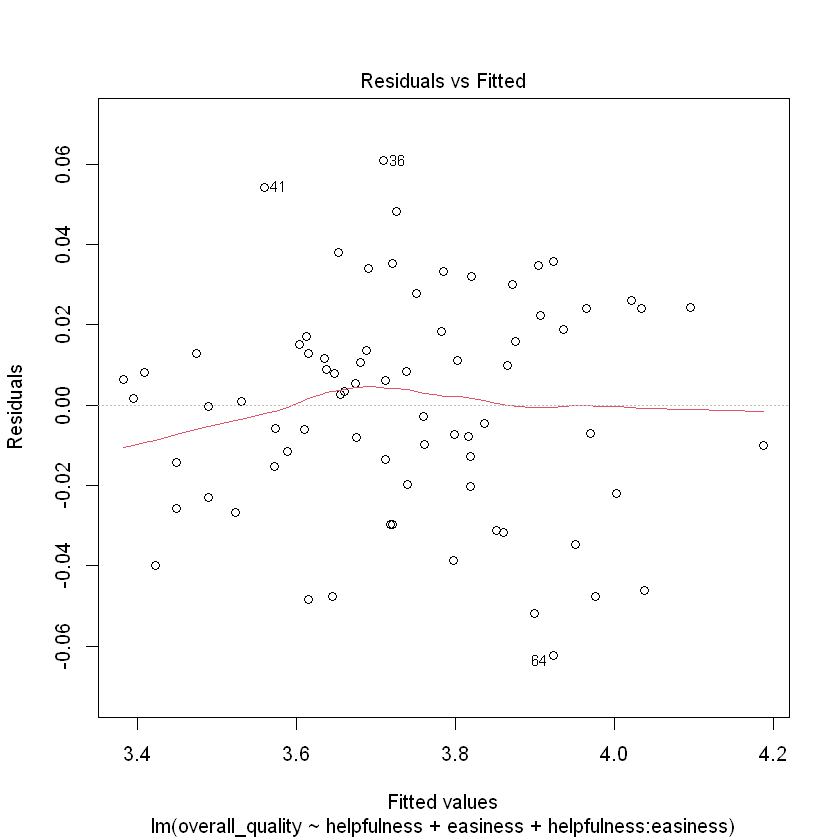

In [23]:
plot(mod_3, which = 1)

Ideally the pattern of residuals should be random. A nonrandom pattern indicates that there is a systematic pattern in the data that the linear model is not capturing (e.g. nonlinearity).

#### Checking the Independence of Observations assumption

The cell below performs the Durbin-Watson test, to check the Independence of Observations assumption.

In [24]:
# perform the Durbin Watson test, on the linear regression model
durbin_wat_test = durbinWatsonTest(mod_3)

# show the test results
print(durbin_wat_test)

 lag Autocorrelation D-W Statistic p-value
   1     -0.01640748      2.022389   0.942
 Alternative hypothesis: rho != 0


If the $p$-value is significant, then this indicates that the assumption is violated.

#### Check the Normality of Errors assumption 

The cell below generates a *Normal Quantile-Quantile* plot, which allows us to graphically check the Normality of Errors assumption:

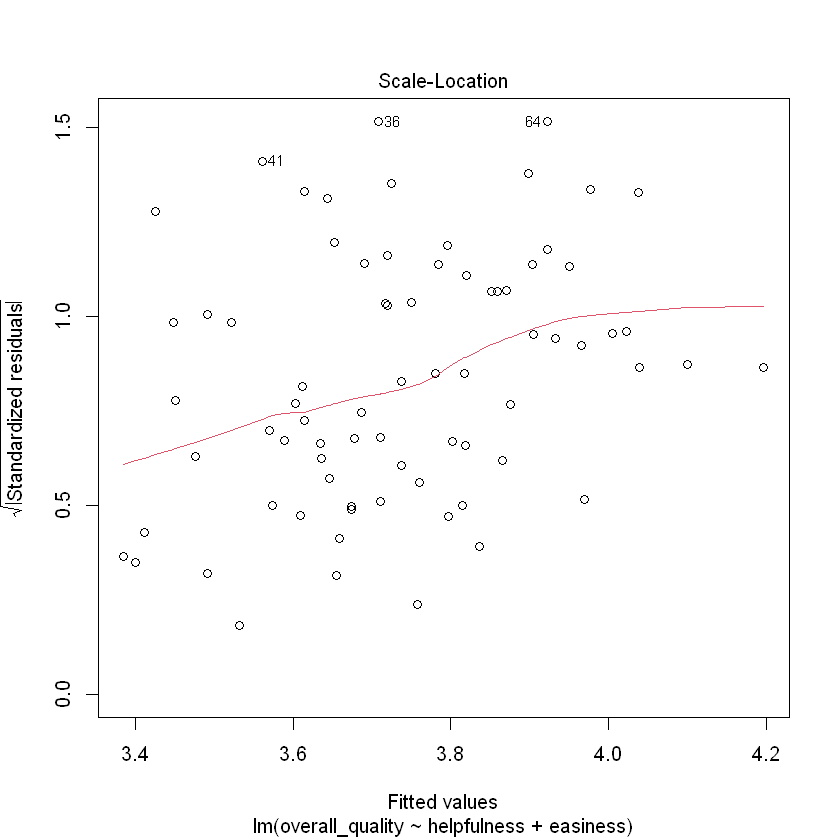

In [25]:
plot(mod_2, which = 3)

If the assumption is met, then the points on the scatterplot should fall in a straight line following the diagonal line that runs across the plot. If the assumption is not met, the points will deviate from that line, as shown in the plot below:

![](images/bad_qq_plot.png)

We can also check the Normality of Residuals assumption by performing the Shapiro-Wilk test on the residuals from the model:

In [26]:
# perform the shapiro-wilk test on the studentized residuals
shap_test = shapiro.test(studres(mod_3))

# print the test results
print(shap_test)


	Shapiro-Wilk normality test

data:  studres(mod_3)
W = 0.98922, p-value = 0.7799



A significant $p$-value would indicate that the assumption is violated.

#### Checking the Equality of Variance assumption

The cell below checks the Equality of Variance assumption, using the test of nonconstant variance:

In [27]:
# checking for homoscedasticity, with the test of nonconstant variance
homosc_test = ncvTest(mod_3)

# print the test results
print(homosc_test)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1.979484, Df = 1, p = 0.15944


Again, a significant $p$-value would indicate that the assumption is violated.

## Summary

This very brief tutorial has shown how to:

* import data to R from a csv file and store it in a dataframe
* retrieve rows of the dataframe, either by integer indexing or label-based indexing
* generate histograms, scatterplots and various diagnostic plots
* fit linear regression models
* run various assumption-checking tests on linear regression models

I hope it is apparent that, were it not for the text cells in this notebook, all of the above can be achieved with relatively few lines of code. The numerous benefits of R include that:

- it is free, and easy to obtain
- new functionality is consistently added by the R community, enabling new types of analysis
- writing analyses in R means that the exact analysis performed (including how the data was cleaned and processed prior to model fitting) can easily be read and checked by others; promoting reproducibility and open science

## Exercises

Please see the [Linear Regression Exercises page](GLM.1_Linear_Regression_Exercises.ipynb) for some exercises based on this tutorial.